In [1]:
#K-Nearest Neighbor(KNN)
from pyforest import*
lazy_imports()

['import altair as alt',
 'import pandas as pd',
 'from sklearn.linear_model import Ridge',
 'from sklearn.linear_model import Lasso',
 'import fastai',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import matplotlib as mpl',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.decomposition import PCA',
 'from sklearn.linear_model import LinearRegression',
 'import pydot',
 'import re',
 'import gensim',
 'import tensorflow as tf',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import GridSearchCV',
 'import skimage',
 'import matplotlib.pyplot as plt',
 'import glob',
 'import statsmodels.api as sm',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import imutils',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import OneHotEncoder',
 'import plotly as py',
 'from dask import dataframe as dd',
 'fro

In [2]:
data = pd.read_csv('Cancer.csv')
data.head()

<IPython.core.display.Javascript object>

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [4]:
data.shape

(569, 32)

In [5]:
data['diagnosis']=data['diagnosis'].astype('category')

In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df = data.drop(labels='id',axis=1)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = df.drop(labels='diagnosis',axis=1)
y = df['diagnosis']

In [10]:
from scipy.stats import zscore
XScaled = X.apply(zscore)

In [11]:
XScaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [12]:
XScaled_df=pd.DataFrame(XScaled)

<IPython.core.display.Javascript object>

In [13]:
XScaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(XScaled_df,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [17]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [18]:
KNN_predict=KNN.predict(X_test)

In [19]:
KNN_predict

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [20]:
KNN.score(X_test,y_test)

0.9532163742690059

Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

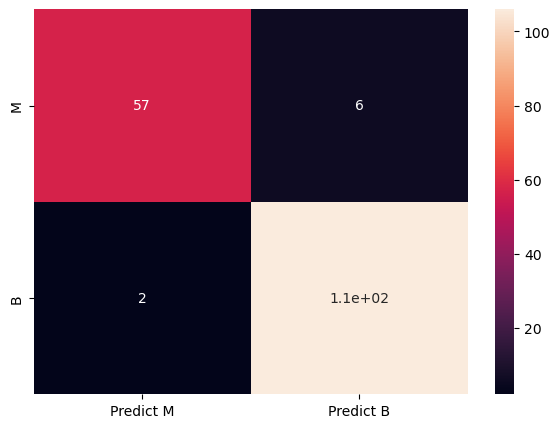

In [21]:
from sklearn import metrics
print("Confusion Matrix")

cm = metrics.confusion_matrix(y_test,KNN_predict,labels=["M","B"])
df_cm=pd.DataFrame(cm,index=[i for i in ["M","B"]],columns=[i for i in ["Predict M","Predict B"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
plt.show()

In [22]:
#Choosing K in KNN

In [23]:
from sklearn.model_selection import cross_val_score


In [24]:
scores_1=[]
for i in range(1,50):
    KNN_2=KNeighborsClassifier(n_neighbors=i)
    score_2=cross_val_score(KNN_2,XScaled_df.values,y.values,cv=10)
    scores_1.append(score_2)

In [25]:
score_2

array([0.96491228, 0.92982456, 0.9122807 , 0.94736842, 0.96491228,
       0.98245614, 0.92982456, 0.98245614, 0.98245614, 0.94642857])

In [26]:
len(scores_1)

49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Accuracy')

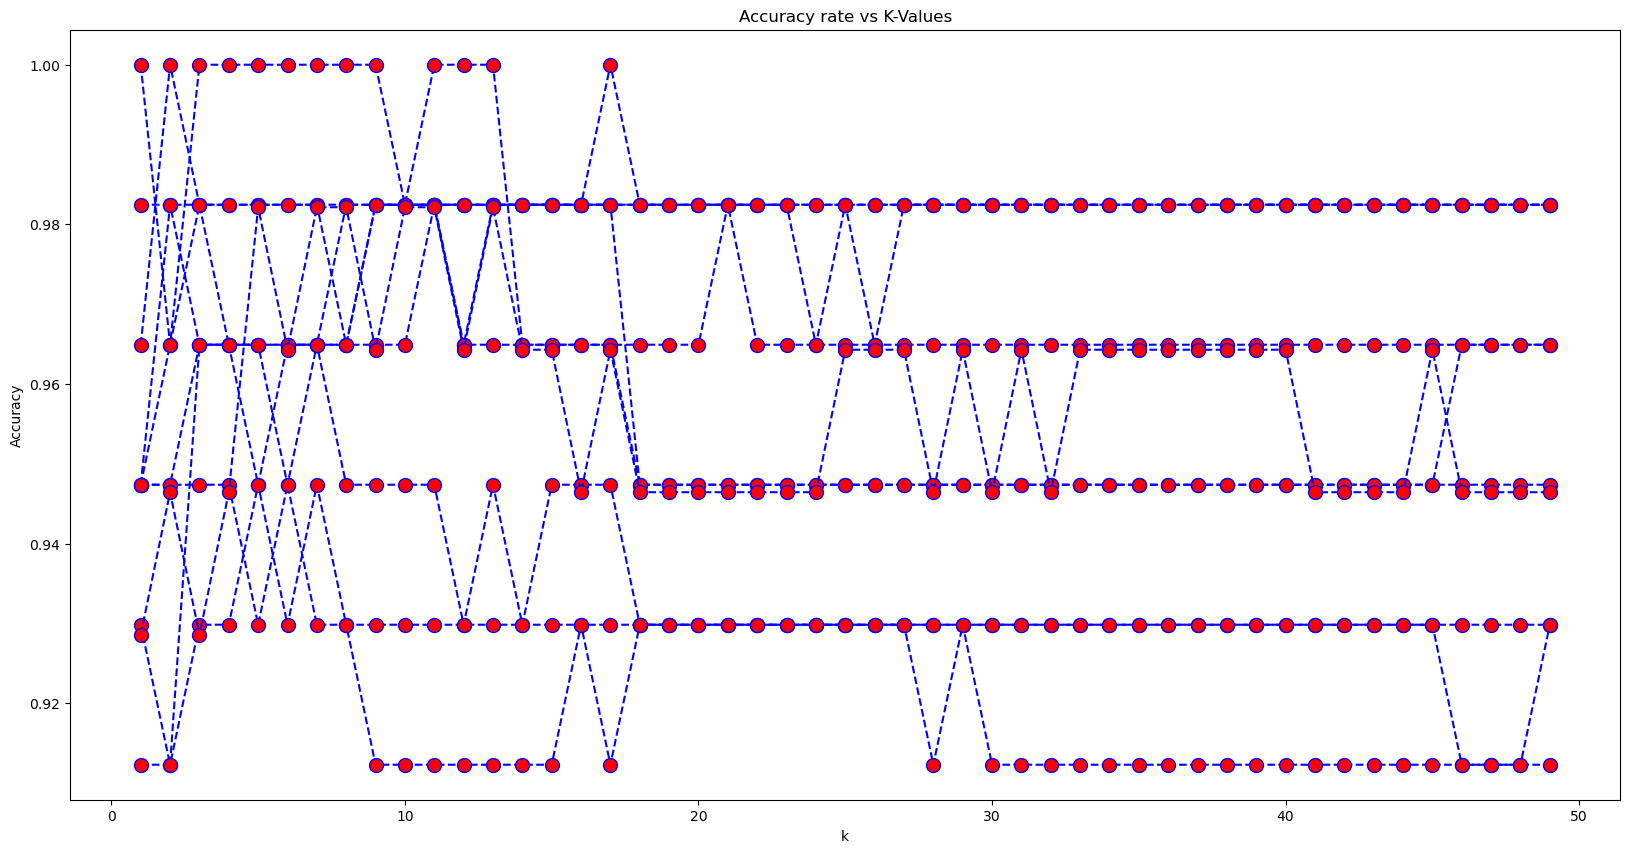

In [27]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),scores_1,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title("Accuracy rate vs K-Values")
plt.xlabel('k')
plt.ylabel('Accuracy')

In [28]:
KNN = KNeighborsClassifier(n_neighbors=10,weights='distance')

In [29]:
KNN.fit(X_train,y_train)
KNN_predict=KNN.predict(X_test)

In [30]:
KNN.score(X_test,y_test)

0.9649122807017544

Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

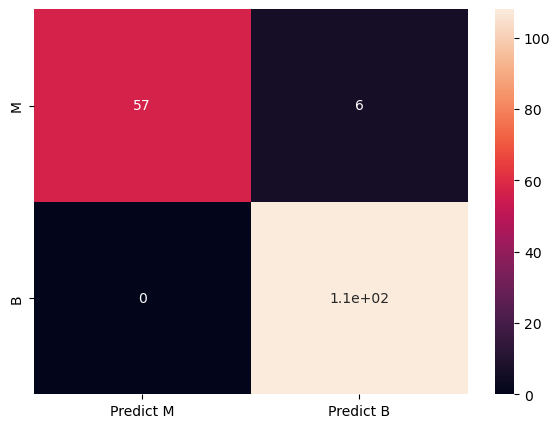

In [31]:
from sklearn import metrics
print("Confusion Matrix")

cm = metrics.confusion_matrix(y_test,KNN_predict,labels=["M","B"])
df_cm=pd.DataFrame(cm,index=[i for i in ["M","B"]],columns=[i for i in ["Predict M","Predict B"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
plt.show()

In [32]:
#SUPPORT VECTOR MACHINE(SVM)

In [33]:
data2 = pd.read_csv('letter-recognition.csv')
data2.head(10)

<IPython.core.display.Javascript object>

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [34]:
data2.shape

(20000, 17)

In [35]:
df = data2

In [36]:
X = np.array(df)[:,1:16]
y = np.array(df.letter)[:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
X

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [38]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [39]:
X_train=X[0:16000,0:17]
X_test=X[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

In [40]:
from sklearn import svm
model = svm.SVC(C=3)

In [41]:
model.fit(X_train,y_train)

SVC(C=3)

In [42]:
y_predict = model.predict(X_test)

In [43]:
y_predict

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [44]:
model.score(X_test,y_test)

0.927231807951988

In [45]:
y_grid = (np.column_stack([y_test,y_predict]))

<IPython.core.display.Javascript object>

In [46]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [47]:
import string
lab=list(string.ascii_uppercase[0:26])
plab=["Predicted"+ s for s in lab ]

In [48]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [49]:
plab

['PredictedA',
 'PredictedB',
 'PredictedC',
 'PredictedD',
 'PredictedE',
 'PredictedF',
 'PredictedG',
 'PredictedH',
 'PredictedI',
 'PredictedJ',
 'PredictedK',
 'PredictedL',
 'PredictedM',
 'PredictedN',
 'PredictedO',
 'PredictedP',
 'PredictedQ',
 'PredictedR',
 'PredictedS',
 'PredictedT',
 'PredictedU',
 'PredictedV',
 'PredictedW',
 'PredictedX',
 'PredictedY',
 'PredictedZ']

In [50]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict,labels=lab)
df_cm=pd.DataFrame(cm,index=[i for i in lab],columns=[i for i in plab])

<IPython.core.display.Javascript object>

Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

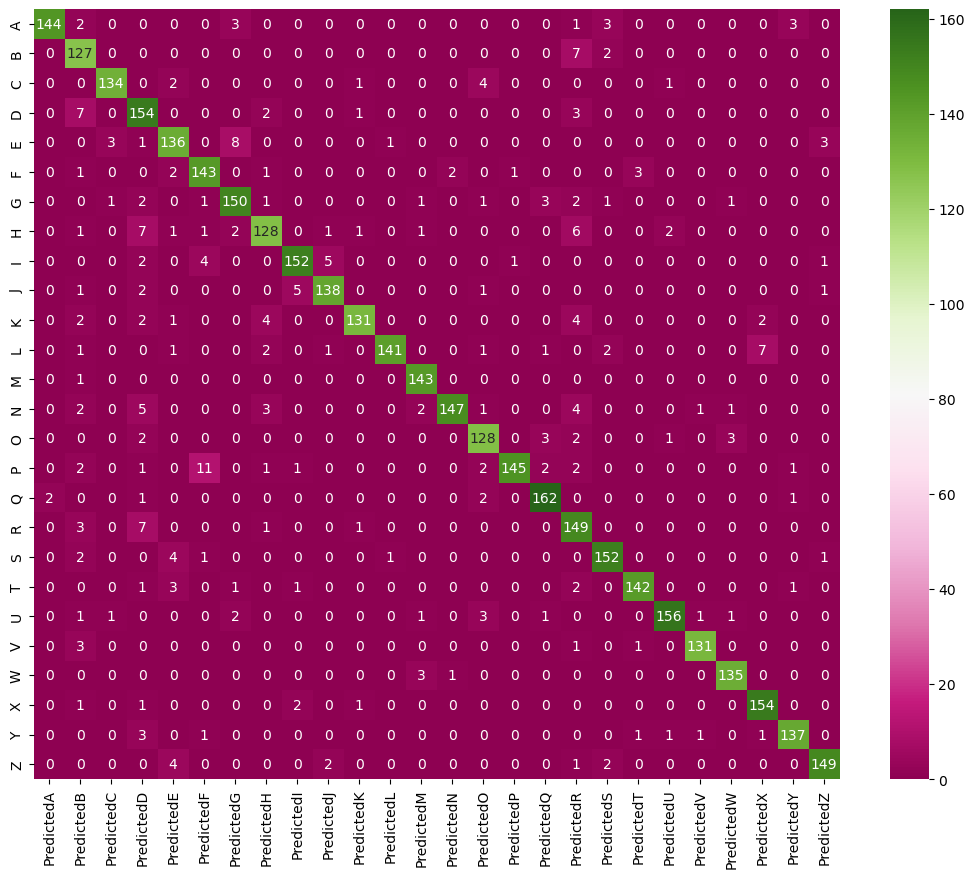

In [51]:
print("Confusion Matrix")
plt.figure(figsize=(13,10))
sns.heatmap(df_cm,annot=True,fmt='g',cmap='PiYG')
plt.show()